In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
df.groupby('CustomerId')['Amounts'].sum()

KeyError: 'Column not found: Amounts'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [9]:
df['Amount'].mean()

np.float64(6717.846433275491)

In [6]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


checking messing values

In [7]:
df.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [22]:
customer_risk = df.groupby('CustomerId').apply(
    lambda x: 1 if (x['Amount'].sum() < -1000) | (x[x['Amount'] >= 0]['Value'].sum() < 5000) 
    else 0
).reset_index(name='IsDefault')

df = df.merge(customer_risk, on='CustomerId')

C:\Users\Hp\AppData\Local\Temp\ipykernel_12764\2685661509.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_risk = df.groupby('CustomerId').apply(


# Outlier Detection

# Detect outlier Method i use 
1 BoxPlot  
2 histogram  
3 scatter plot  
4 z-score   
5 inter quartile range(values out of 1.5 time of IQR) 

In [41]:
# function to detect outlier in one dimensional dataset 
import statistics as st
def find_anomalies(data):
    anamolis=[]
    random_data_std=st.stdev(data)
    random_data_mean=st.mean(data)
    anomaly_cut_off=2*random_data_std
    lower_limit=random_data_mean-anomaly_cut_off
    upper_limit=random_data_mean+anomaly_cut_off
    for outlier in data:
        if outlier < lower_limit or outlier > upper_limit:
            anamolis.append(outlier)
    return anamolis

In [50]:
print(len(df['Amount']))
print(len(find_anomalies(df['Amount']))) # outlier must be 0.3%
print(f' percentage {(342/95662)*100} %')
print(df['Amount'].skew())

95662
342
 percentage 0.3575087286487843 %
51.098489522819115


<Axes: xlabel='Amount', ylabel='Density'>

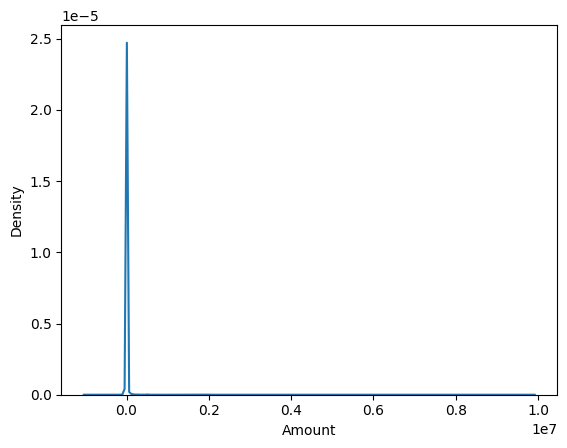

In [54]:

sns.kdeplot(df['Amount'])# right skewed

boxplot for detecting outlier 

<Axes: ylabel='Value'>

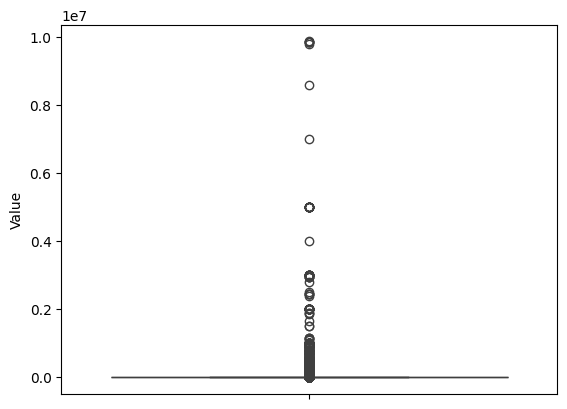

In [63]:
plt.figure(figsize=(15, 6))

# Value Outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Value'])
plt.title('Value Distribution')


plt.tight_layout()
plt.show()

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))]
print(f"Value outliers: {len(outliers)/len(df):.2%}")

# Univariate Analysis

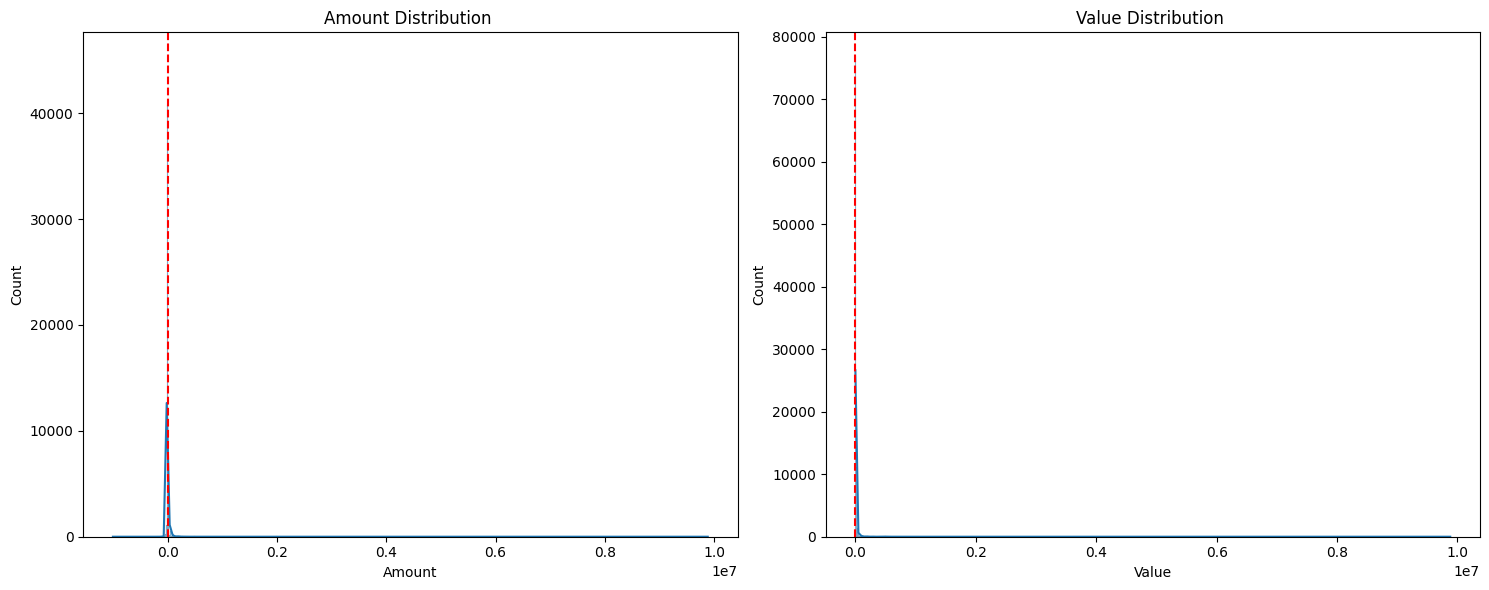

In [11]:
num_features=['Amount','Value']
plt.figure(figsize=(15,6))
for i ,feature in enumerate(num_features,1):
    plt.subplot(1,2,i)
    sns.histplot(df[feature],kde=True,bins=1000)
    plt.axvline(df[feature].median(),color='r',linestyle='--')
    plt.title(f'{feature} Distribution ')
plt.tight_layout()
plt.show()

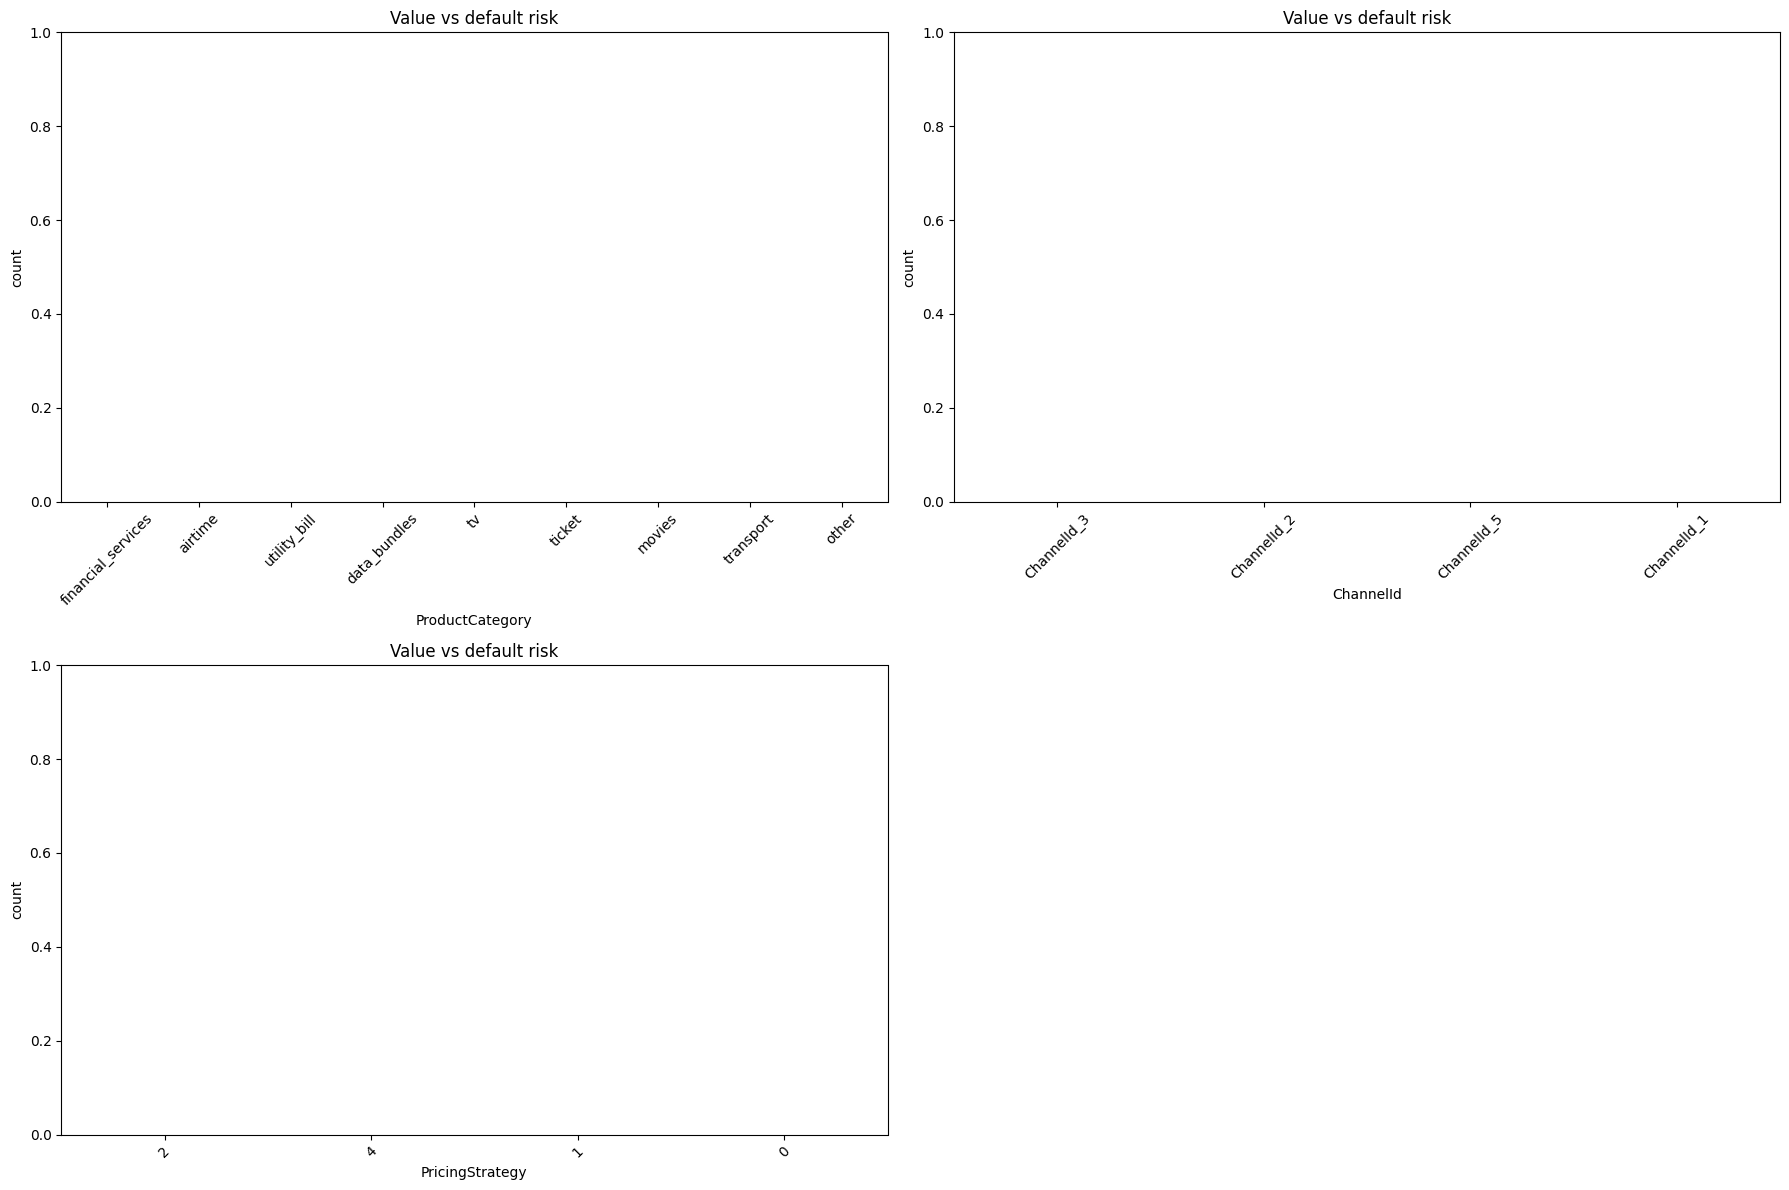

In [24]:
# cat_features=['ProductCategory', 'ChannelId', 'PricingStrategy']
# plt.figure(figsize=(18,12))
# for i ,features in enumerate(cat_features,1):
#     plt.subplot(2,2,i)
#     sns.countplot(data=df,x=features,hue='isDefault',order=df[features].value_counts().index)
#     plt.xticks(rotation=45)
#     plt.title(f'{feature} vs default risk')
# plt.tight_layout()
# plt.show()

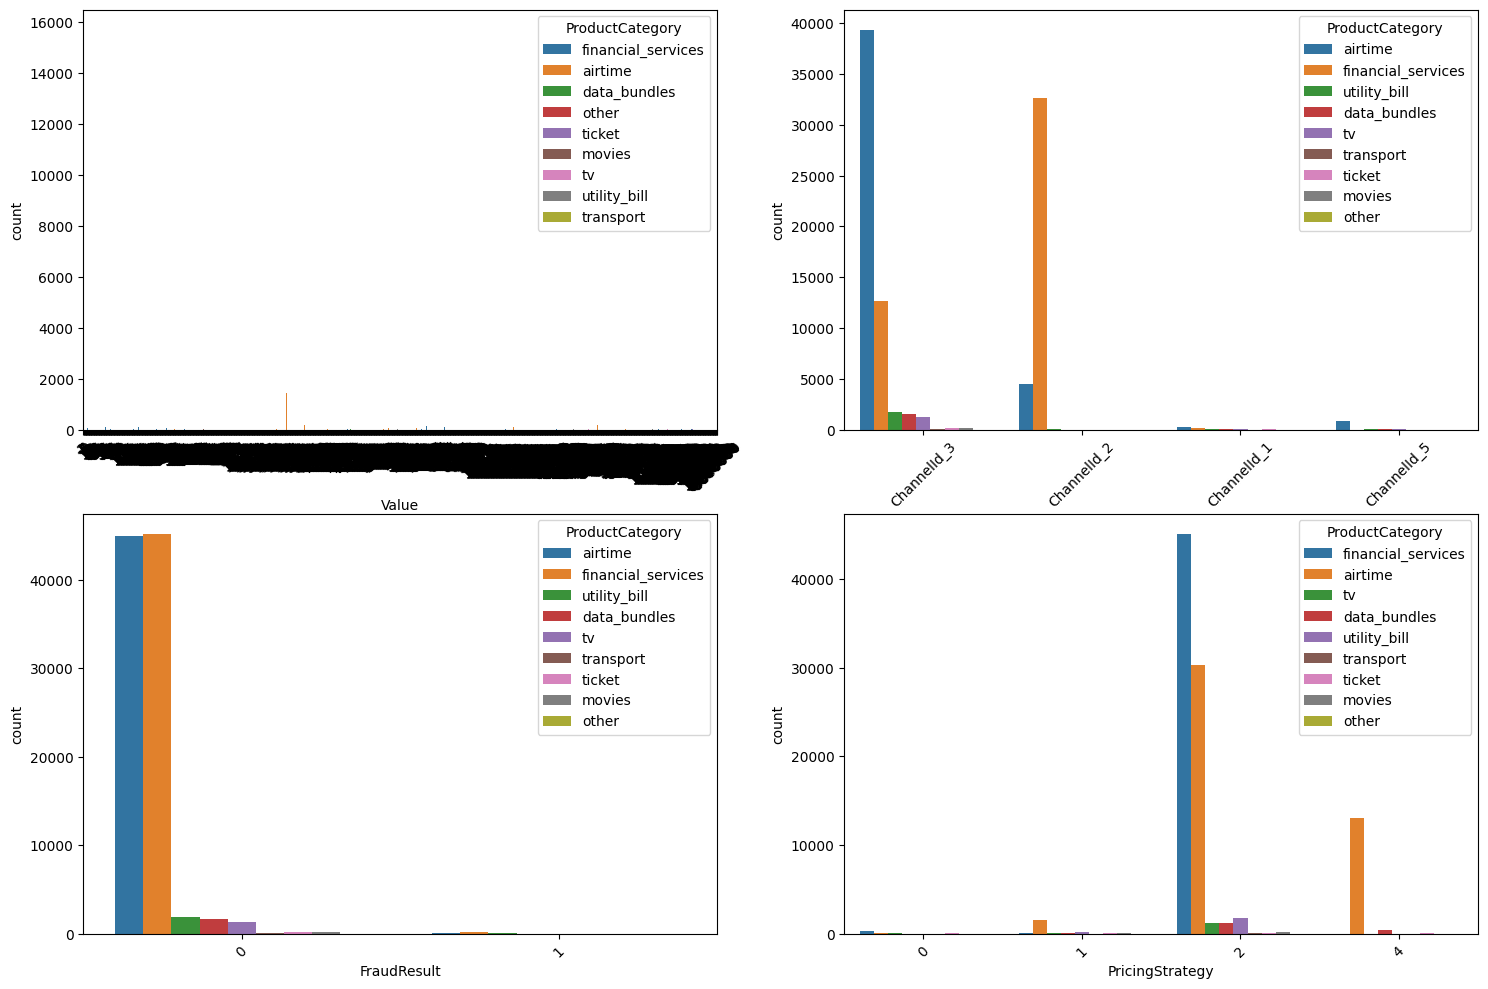

In [13]:
check=df[['Value','ProductCategory','ChannelId','FraudResult','PricingStrategy']]
plt.figure(figsize=(18,12))
for i ,predictor in enumerate(check.drop(columns=['ProductCategory']),1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=predictor ,hue='ProductCategory')
    plt.xticks(rotation=45)
plt.show()

# Bivariate

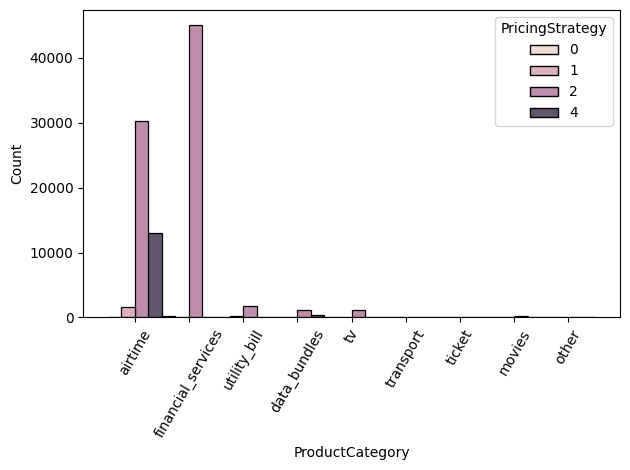

In [81]:
plt.Figure(figsize=(8,10))
sns.histplot(data=df,x='ProductCategory',hue='PricingStrategy',multiple='dodge')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<Axes: xlabel='ProductCategory', ylabel='Count'>

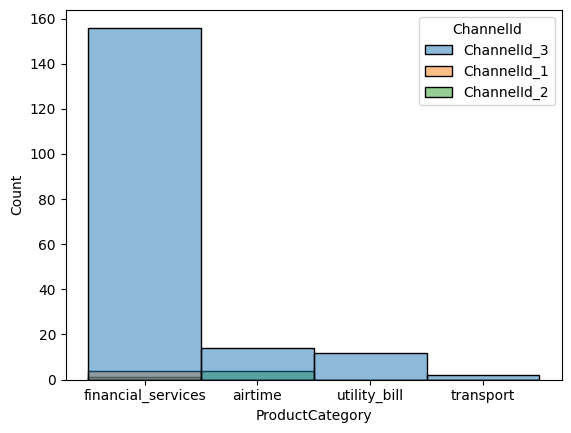

In [93]:
data_fraud=df[df['FraudResult']==1]

sns.histplot(data=data_fraud,x='ProductCategory',hue='ChannelId')

MultiVariate

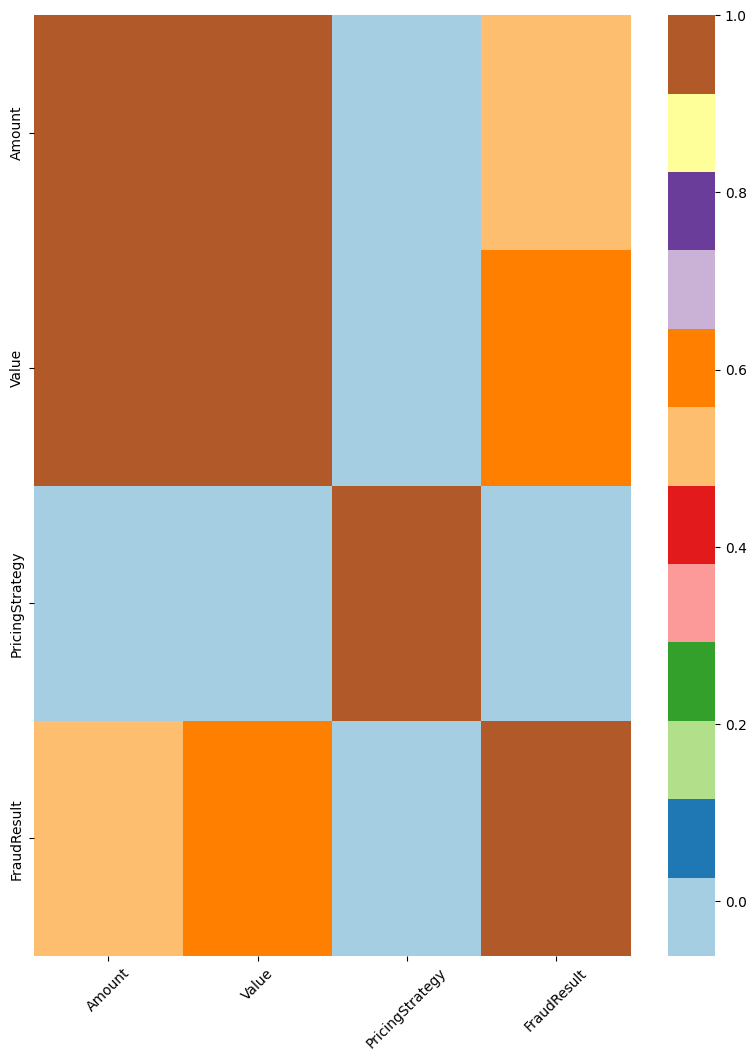

In [111]:
data=df.select_dtypes(include=['float64','int64']).drop(columns=['CountryCode'],axis=1)
plt.figure(figsize=(8,10))
sns.heatmap(data.corr(),cmap='Paired')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [117]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

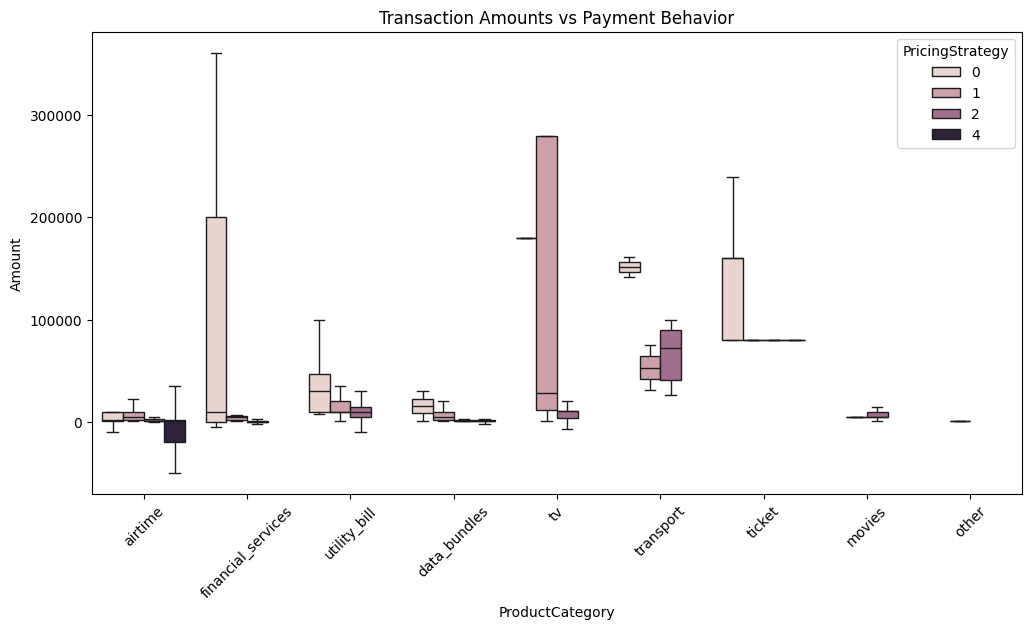

In [118]:
 # Strategic plot for payment behavior analysis
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='ProductCategory', y='Amount', hue='PricingStrategy', showfliers=False)
plt.title('Transaction Amounts vs Payment Behavior')
plt.xticks(rotation=45)
plt.show()

There is outlier in value and amount is more 50%  
fraud and amount is higly corrleated and amount and pricing strategy not correlated higly  
more fraud and risk are in finicial services and air time and also  
channel1 and 2 are most wiedly used to buy categories  